In [1]:
import numpy as np
dataset_filename = 'affinity_dataset.txt'
X = np.loadtxt(dataset_filename)

In [2]:
n_samples, n_features = X.shape

In [3]:
print(X[:5])

[[ 0.  0.  1.  1.  1.]
 [ 1.  1.  0.  1.  0.]
 [ 1.  0.  1.  1.  0.]
 [ 0.  0.  1.  1.  1.]
 [ 0.  1.  0.  0.  1.]]


In [4]:
features = ['bread', 'milk', 'cheese', 'apples', 'bananas']

In [5]:
from collections import defaultdict
valid_rules = defaultdict(int)
invalid_rules = defaultdict(int)
num_occurences = defaultdict(int)

In [6]:
for sample in X:
    for premise in range(n_features):   
        if sample[premise] == 0: continue
# Record that the premise was bought in another transaction
        num_occurences[premise] += 1
        for conclusion in range(n_features):
            if premise == conclusion: continue
            if sample[conclusion] == 1:
                valid_rules[(premise,conclusion)]+= 1

In [7]:
support = valid_rules

In [8]:
confidence = defaultdict (float)
for premise, conclusion in valid_rules.keys():
    rule = (premise, conclusion)
    confidence[rule] = valid_rules[rule]/ num_occurences[premise]

In [9]:
for premise, conclusion in confidence:
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buyes {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format(confidence[(premise,conclusion)]))
    print(" - Support: {0}".format(support[(premise,conclusion)]))
    print("")

Rule: If a person buyes cheese they will also buy apples
 - Confidence: 0.610
 - Support: 25

Rule: If a person buyes cheese they will also buy bananas
 - Confidence: 0.659
 - Support: 27

Rule: If a person buyes apples they will also buy cheese
 - Confidence: 0.694
 - Support: 25

Rule: If a person buyes apples they will also buy bananas
 - Confidence: 0.583
 - Support: 21

Rule: If a person buyes bananas they will also buy cheese
 - Confidence: 0.458
 - Support: 27

Rule: If a person buyes bananas they will also buy apples
 - Confidence: 0.356
 - Support: 21

Rule: If a person buyes bread they will also buy milk
 - Confidence: 0.519
 - Support: 14

Rule: If a person buyes bread they will also buy apples
 - Confidence: 0.185
 - Support: 5

Rule: If a person buyes milk they will also buy bread
 - Confidence: 0.304
 - Support: 14

Rule: If a person buyes milk they will also buy apples
 - Confidence: 0.196
 - Support: 9

Rule: If a person buyes apples they will also buy bread
 - Confiden

In [10]:
from operator import itemgetter

In [11]:
sorted_support = sorted(support.items(), key = itemgetter(1), reverse = True)
sorted_confidence = sorted(confidence.items(), key = itemgetter(1), reverse = True)

In [12]:
def print_rule(premise, conclusion, support, confidence, features):
    premise_name = features[premise]
    conclusion_name = features[conclusion]
    print("Rule: If a person buyes {0} they will also buy {1}".format(premise_name, conclusion_name))
    print(" - Confidence: {0:.3f}".format(confidence[(premise,conclusion)]))
    print(" - Support: {0}".format(support[(premise,conclusion)]))
    print("")

In [13]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    premise, conclusion = sorted_support[index][0] 
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buyes cheese they will also buy bananas
 - Confidence: 0.659
 - Support: 27

Rule #2
Rule: If a person buyes bananas they will also buy cheese
 - Confidence: 0.458
 - Support: 27

Rule #3
Rule: If a person buyes cheese they will also buy apples
 - Confidence: 0.610
 - Support: 25

Rule #4
Rule: If a person buyes apples they will also buy cheese
 - Confidence: 0.694
 - Support: 25

Rule #5
Rule: If a person buyes apples they will also buy bananas
 - Confidence: 0.583
 - Support: 21



In [14]:
for index in range(5):
    print("Rule #{0}".format(index + 1))
    premise, conclusion = sorted_confidence[index][0] 
    print_rule(premise, conclusion, support, confidence, features)

Rule #1
Rule: If a person buyes apples they will also buy cheese
 - Confidence: 0.694
 - Support: 25

Rule #2
Rule: If a person buyes cheese they will also buy bananas
 - Confidence: 0.659
 - Support: 27

Rule #3
Rule: If a person buyes bread they will also buy bananas
 - Confidence: 0.630
 - Support: 17

Rule #4
Rule: If a person buyes cheese they will also buy apples
 - Confidence: 0.610
 - Support: 25

Rule #5
Rule: If a person buyes apples they will also buy bananas
 - Confidence: 0.583
 - Support: 21



In [15]:
%matplotlib inline

In [16]:
from matplotlib import pyplot as plt

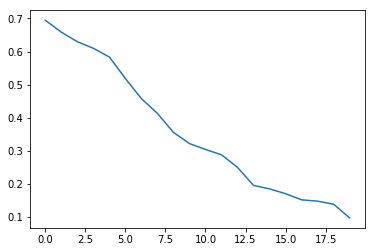

In [17]:
plt.plot([confidence[rule[0]] for rule in sorted_confidence])